In [1]:
import pandas as pd

/scratch/gilbreth/iyer95/conda_envs/plot/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/scratch/gilbreth/iyer95/conda_envs/plot/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# Gramacy Lee BO Trial plot

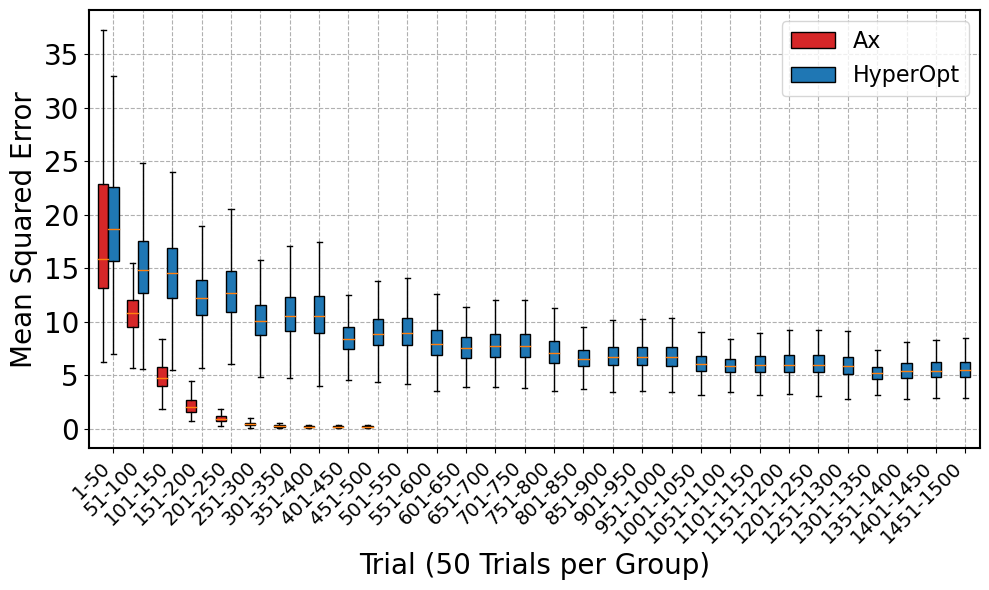

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.patches import Patch  # Import Patch for legend handles

# Configuration dictionary
config = {
    'file_paths': [  # List of dictionaries for multiple CSV files
        {
            'path': 'ax_gramacy_06Dec24__500trialsK_CPUparallel_7528819.csv',
            'label': 'Ax'
        },
        {
            'path': 'gramacy_Hyperopt_11Jan25_7704032_TRIALS.csv',
            'label': 'HyperOpt'
        },
        # You can add more file entries here, e.g.,
        # {
        #     'path': 'random_gramacy.csv',
        #     'label': 'Random'
        # },
    ],
    'columns': {
        'trial': 'Trial',
        'mse': 'MSE'
    },
    'plot': {
        'x_label': 'Trial (50 Trials per Group)',
        'y_label': 'Mean Squared Error',
        'fig_size': (10, 6),
        'bin_size': 50,  # Number of trials per bin
        # Removed 'colors' as we'll use the color_scheme instead
    }
}

# Muted color scheme
color_scheme = {
    'Ax': '#D62728',        # Muted red
    'HyperOpt': '#1F77B4',  # Muted blue
    'Random': '#2CA02C',     # Green
    # Add more mappings if you have more algorithms
}


def read_data(file_path, columns, label):
    """
    Reads a CSV file and adds a 'Source' column.
    """
    try:
        df = pd.read_csv(file_path, usecols=columns.values())
        df['Source'] = label  # Label for the source
        return df
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File {file_path} is empty.")
        return None
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

def bin_trials(df, trial_col, bin_size):
    """
    Adds a binned column to the DataFrame based on the trial column.
    """
    df[trial_col] = pd.to_numeric(df[trial_col], errors='coerce')
    bins = np.arange(df[trial_col].min(), df[trial_col].max() + bin_size, bin_size)
    bin_labels = [f"{int(start)}-{int(start + bin_size - 1)}" for start in bins[:-1]]
    df['Trial_Bin'] = pd.cut(df[trial_col], bins=bins, labels=bin_labels, include_lowest=True)
    return df

def plot_grouped_boxplot(df, bin_col, mse_col, source_col, config, color_scheme):
    """
    Plots a grouped boxplot with data from multiple sources, fixing bin order and applying the color scheme.
    """
    # Filter valid data
    df = df.dropna(subset=[bin_col, mse_col])

    # Extract and sort bin labels based on the starting trial number
    bins = sorted(df[bin_col].dropna().unique(), key=lambda x: int(str(x).split('-')[0]))
    
    # Extract and sort unique sources to maintain consistent color mapping
    sources = sorted(df[source_col].unique())

    # Plot configuration
    box_data = []
    box_colors = []
    positions = []
    width = 0.7 / len(sources)  # Adjust width for multiple sources

    for i, b in enumerate(bins):
        for j, source in enumerate(sources):
            subset = df[(df[bin_col] == b) & (df[source_col] == source)][mse_col]
            box_data.append(subset)
            positions.append(i + 1 - 0.35 + j * width)
            # Assign color based on source; default to gray if not specified
            box_colors.append(color_scheme.get(source, '#7f7f7f'))

    plt.figure(figsize=config['plot']['fig_size'])
    boxplot = plt.boxplot(
        box_data,
        positions=positions,
        widths=width,
        patch_artist=True,
        showfliers=False  # Hide outliers for clarity
    )

    # Apply colors to each box based on the color_scheme
    for patch, color in zip(boxplot['boxes'], box_colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')  # Optional: Add border to boxes for better visibility

    # Create custom legend handles using Patch
    legend_handles = [Patch(facecolor=color_scheme[source], edgecolor='black', label=source) for source in sources]
    plt.legend(handles=legend_handles, loc='upper right', fontsize=16, title_fontsize=16)

    # Set x-axis labels
    plt.xticks(range(1, len(bins) + 1), bins, rotation=45, ha='right', fontsize=14)
    
    # Set y-axis labels
    plt.yticks(fontsize=20)
    
    # Set plot title and axis labels
    plt.xlabel(config['plot']['x_label'], fontsize=20)
    plt.ylabel(config['plot']['y_label'], fontsize=20)

    # Add grid lines for better readability
    plt.grid(axis='both', linestyle='--', alpha=1)

    # Customize spines
    ax = plt.gca()  # Get current axis
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set spine thickness
        spine.set_color('black')  # Set spine color

    plt.tight_layout()
    plt.savefig('GramacyLee_BO_Trial_MSE_norandom.png', dpi=300, bbox_inches='tight')
    plt.show()


def main():
    data_frames = []

    # Read data and preprocess
    for file_info in config['file_paths']:
        df = read_data(file_info['path'], config['columns'], file_info['label'])
        if df is not None:
            df = bin_trials(df, config['columns']['trial'], config['plot']['bin_size'])
            data_frames.append(df)

    if data_frames:
        combined_data = pd.concat(data_frames, ignore_index=True)
        plot_grouped_boxplot(
            combined_data,
            bin_col='Trial_Bin',
            mse_col=config['columns']['mse'],
            source_col='Source',
            config=config,
            color_scheme=color_scheme
        )
    else:
        print("No valid data to plot.")

if __name__ == "__main__":
    main()


# zoomed in

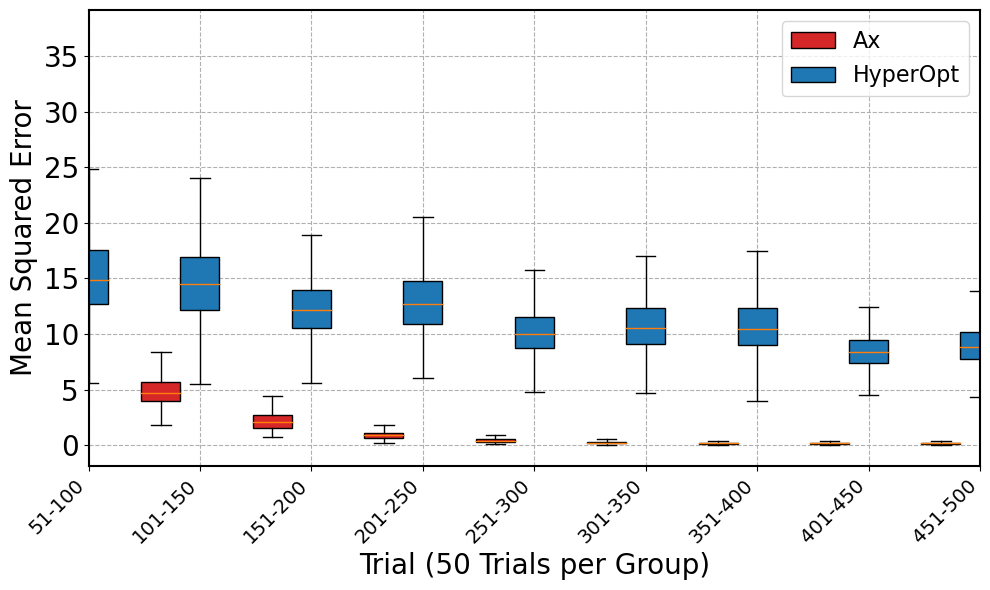

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.patches import Patch  # Import Patch for legend handles

# Configuration dictionary
config = {
    'file_paths': [  # List of dictionaries for multiple CSV files
        {
            'path': 'ax_gramacy_06Dec24__500trialsK_CPUparallel_7528819.csv',
            'label': 'Ax'
        },
        {
            'path': 'gramacy_Hyperopt_11Jan25_7704032_TRIALS.csv',
            'label': 'HyperOpt'
        },
        # You can add more file entries here, e.g.,
        # {
        #     'path': 'random_gramacy.csv',
        #     'label': 'Random'
        # },
    ],
    'columns': {
        'trial': 'Trial',
        'mse': 'MSE'
    },
    'plot': {
        'x_label': 'Trial (50 Trials per Group)',
        'y_label': 'Mean Squared Error',
        'fig_size': (10, 6),
        'bin_size': 50,  # Number of trials per bin
        # Removed 'colors' as we'll use the color_scheme instead
    }
}

# Muted color scheme
color_scheme = {
    'Ax': '#D62728',        # Muted red
    'HyperOpt': '#1F77B4',  # Muted blue
    'Random': '#2CA02C',     # Green
    # Add more mappings if you have more algorithms
}


def read_data(file_path, columns, label):
    """
    Reads a CSV file and adds a 'Source' column.
    """
    try:
        df = pd.read_csv(file_path, usecols=columns.values())
        df['Source'] = label  # Label for the source
        return df
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File {file_path} is empty.")
        return None
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

def bin_trials(df, trial_col, bin_size):
    """
    Adds a binned column to the DataFrame based on the trial column.
    """
    df[trial_col] = pd.to_numeric(df[trial_col], errors='coerce')
    bins = np.arange(df[trial_col].min(), df[trial_col].max() + bin_size, bin_size)
    bin_labels = [f"{int(start)}-{int(start + bin_size - 1)}" for start in bins[:-1]]
    df['Trial_Bin'] = pd.cut(df[trial_col], bins=bins, labels=bin_labels, include_lowest=True)
    return df

def plot_grouped_boxplot(df, bin_col, mse_col, source_col, config, color_scheme):
    """
    Plots a grouped boxplot with data from multiple sources, fixing bin order and applying the color scheme.
    """
    # Filter valid data
    df = df.dropna(subset=[bin_col, mse_col])

    # Extract and sort bin labels based on the starting trial number
    bins = sorted(df[bin_col].dropna().unique(), key=lambda x: int(str(x).split('-')[0]))
    
    # Extract and sort unique sources to maintain consistent color mapping
    sources = sorted(df[source_col].unique())

    # Plot configuration
    box_data = []
    box_colors = []
    positions = []
    width = 0.7 / len(sources)  # Adjust width for multiple sources

    for i, b in enumerate(bins):
        for j, source in enumerate(sources):
            subset = df[(df[bin_col] == b) & (df[source_col] == source)][mse_col]
            box_data.append(subset)
            positions.append(i + 1 - 0.35 + j * width)
            # Assign color based on source; default to gray if not specified
            box_colors.append(color_scheme.get(source, '#7f7f7f'))

    plt.figure(figsize=config['plot']['fig_size'])
    boxplot = plt.boxplot(
        box_data,
        positions=positions,
        widths=width,
        patch_artist=True,
        showfliers=False  # Hide outliers for clarity
    )

    # Apply colors to each box based on the color_scheme
    for patch, color in zip(boxplot['boxes'], box_colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')  # Optional: Add border to boxes for better visibility

    # Create custom legend handles using Patch
    legend_handles = [Patch(facecolor=color_scheme[source], edgecolor='black', label=source) for source in sources]
    plt.legend(handles=legend_handles, loc='upper right', fontsize=16, title_fontsize=16)

    # Set x-axis labels
    plt.xticks(range(1, len(bins) + 1), bins, rotation=45, ha='right', fontsize=14)
    
    # Set y-axis labels
    plt.yticks(fontsize=20)
    
    # Set plot title and axis labels
    plt.xlabel(config['plot']['x_label'], fontsize=20)
    plt.ylabel(config['plot']['y_label'], fontsize=20)

    # Add grid lines for better readability
    plt.grid(axis='both', linestyle='--', alpha=1)
    # xlim 500
    plt.xlim(2, 10)
    # Customize spines
    ax = plt.gca()  # Get current axis
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set spine thickness
        spine.set_color('black')  # Set spine color

    plt.tight_layout()
    plt.savefig('GramacyLee_BO_Trial_MSE_norandomZOOMEDIN.png', dpi=300, bbox_inches='tight')
    plt.show()


def main():
    data_frames = []

    # Read data and preprocess
    for file_info in config['file_paths']:
        df = read_data(file_info['path'], config['columns'], file_info['label'])
        if df is not None:
            df = bin_trials(df, config['columns']['trial'], config['plot']['bin_size'])
            data_frames.append(df)

    if data_frames:
        combined_data = pd.concat(data_frames, ignore_index=True)
        plot_grouped_boxplot(
            combined_data,
            bin_col='Trial_Bin',
            mse_col=config['columns']['mse'],
            source_col='Source',
            config=config,
            color_scheme=color_scheme
        )
    else:
        print("No valid data to plot.")

if __name__ == "__main__":
    main()
